# Supervised methods

In [532]:
df.reset_index(drop=True, inplace=True)
X = df.drop(['ontime'], axis=1)
y = df['ontime']

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
columns = ['Market/Regular', 'vehicle_no', 'OriginLocation_Code', 'DestinationLocation_Code', 'vehicleType', 'Minimum_kms_to_be_covered_in_a_day', 'customerID', 'supplierID', 'Material Shipped', 'dayofweek']
X[columns] = encoder.fit_transform(X[columns])

# split X y to train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### XGBoost

In [533]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_predict = XGB.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
print('confusion matrix:', confusion_matrix(y_test, y_predict))
print('accuracy:', accuracy_score(y_test, y_predict))
print('precision:', precision_score(y_test, y_predict))
print('recall:', recall_score(y_test, y_predict))

confusion matrix: [[ 715   63]
 [  55 1192]]
accuracy: 0.9417283950617283
precision: 0.949800796812749
recall: 0.9558941459502807


### Logistic Regression

In [534]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

LR = LogisticRegression()
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)

print('confusion matrix:', confusion_matrix(y_test, y_predict))
print('accuracy:', accuracy_score(y_test, y_predict))
print('precision:', precision_score(y_test, y_predict))
print('recall:', recall_score(y_test, y_predict))

confusion matrix: [[ 471  307]
 [ 195 1052]]
accuracy: 0.7520987654320987
precision: 0.7740986019131715
recall: 0.8436246992782679


### Random Forest

In [535]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)

print('confusion matrix:', confusion_matrix(y_test, y_predict))
print('accuracy:', accuracy_score(y_test, y_predict))
print('precision:', precision_score(y_test, y_predict))
print('recall:', recall_score(y_test, y_predict))

confusion matrix: [[ 717   61]
 [  64 1183]]
accuracy: 0.9382716049382716
precision: 0.9509646302250804
recall: 0.9486768243785084


In [536]:
X.head()

,Market/Regular,vehicle_no,OriginLocation_Code,DestinationLocation_Code,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,customerID,supplierID,Material Shipped,Org_lat,Org_lon,Des_lat,Des_lon,trip_time,day,month,year,dayofweek
0,0.0,751.0,29.0,136.0,320.0,43.0,0.0,0.0,313.0,146.0,13.155,80.196,12.740,77.820,360000.000,17,8,2020,0.0
1,1.0,1669.0,20.0,16.0,103.0,43.0,0.0,5.0,315.0,1348.0,12.839,79.954,12.839,79.954,360030.827,27,8,2020,3.0
2,1.0,1550.0,26.0,33.0,300.0,43.0,0.0,20.0,282.0,614.0,11.871,79.739,11.871,79.739,360140.987,27,8,2020,3.0
3,1.0,1633.0,20.0,16.0,61.0,43.0,0.0,5.0,268.0,759.0,12.839,79.954,12.839,79.954,360039.503,28,8,2020,4.0
4,1.0,1978.0,19.0,22.0,240.0,43.0,0.0,20.0,306.0,1270.0,11.872,79.632,11.872,79.632,360571.243,28,8,2020,4.0


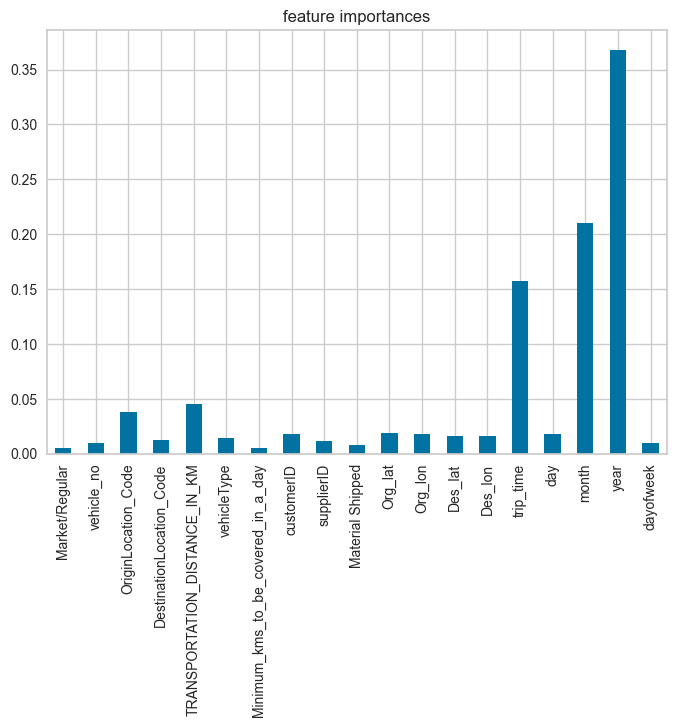

In [537]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(XGB.feature_importances_, index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

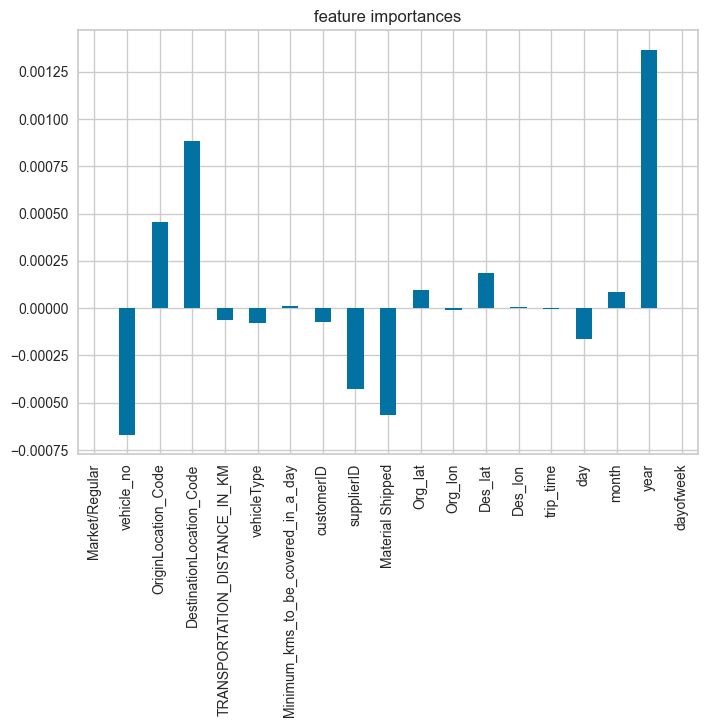

In [538]:
feature_importances = pd.Series(LR.coef_[0], index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

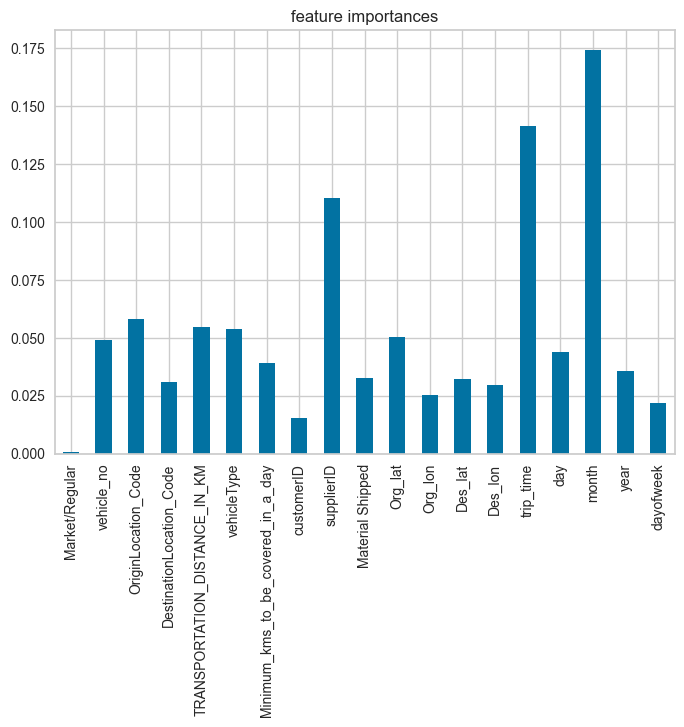

In [539]:
feature_importances = pd.Series(RF.feature_importances_, index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

Important features:
• year
• month
• day

• trip_time
• Minimum_kms_to_be_covered_in_a_day
• transportation_distance_in_km

• supplierID
• Origin_Location_code
Note: There can be some correlation between the above 3 features. Suppier information is more important than customer information. Geo locations of customers is important, but identity of them isn't.

• vehicle type
• vehicle no.

In [540]:
columns1 = ['OriginLocation_Code', 'vehicle_no', 'TRANSPORTATION_DISTANCE_IN_KM', 'vehicleType', 'Minimum_kms_to_be_covered_in_a_day', 'supplierID', 'trip_time', 'day', 'month', 'year']

In [541]:
X1_train = X_train[columns1]
X1_test = X_test[columns1]

confusion matrix: [[ 710   68]
 [  55 1192]]
accuracy: 0.9392592592592592
precision: 0.946031746031746
recall: 0.9558941459502807


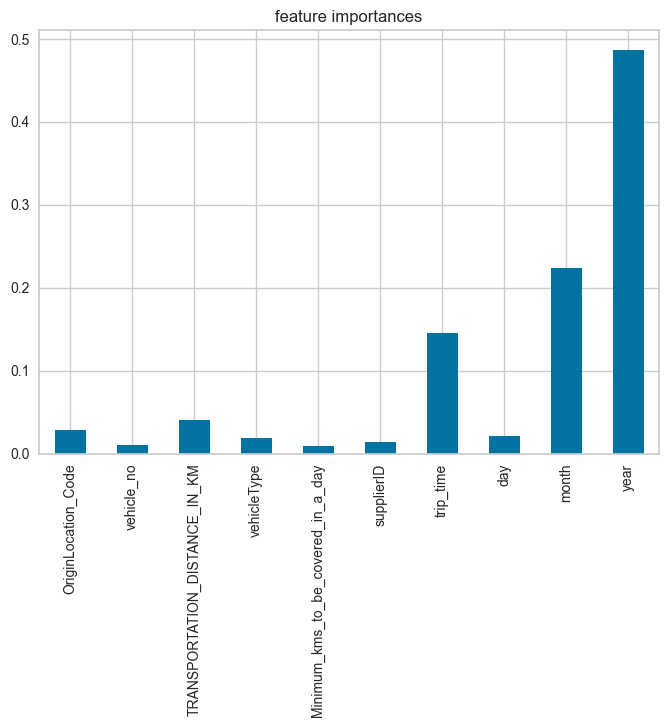

In [542]:
XGB = XGBClassifier()
XGB.fit(X1_train, y_train)
y_predict = XGB.predict(X1_test)

print('confusion matrix:', confusion_matrix(y_test, y_predict))
print('accuracy:', accuracy_score(y_test, y_predict))
print('precision:', precision_score(y_test, y_predict))
print('recall:', recall_score(y_test, y_predict))

feature_importances = pd.Series(XGB.feature_importances_, index = columns1)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

confusion matrix: [[ 487  291]
 [ 190 1057]]
accuracy: 0.7624691358024691
precision: 0.7841246290801187
recall: 0.8476343223736968


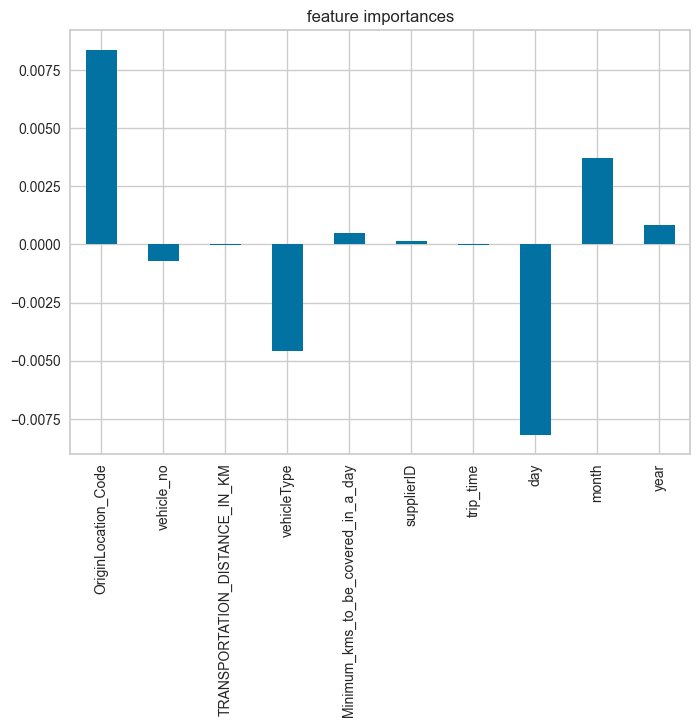

In [543]:
LR = LogisticRegression()
LR.fit(X1_train, y_train)
y_predict = LR.predict(X1_test)

print('confusion matrix:', confusion_matrix(y_test, y_predict))
print('accuracy:', accuracy_score(y_test, y_predict))
print('precision:', precision_score(y_test, y_predict))
print('recall:', recall_score(y_test, y_predict))

feature_importances = pd.Series(LR.coef_[0], index = columns1)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

confusion matrix: [[ 715   63]
 [  61 1186]]
accuracy: 0.9387654320987654
precision: 0.9495596477181746
recall: 0.9510825982357658


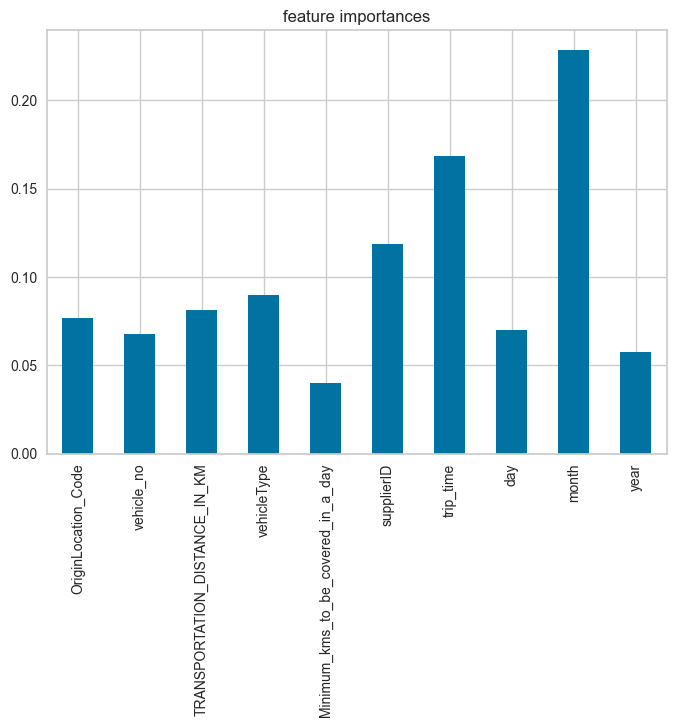

In [544]:
RF = RandomForestClassifier()
RF.fit(X1_train, y_train)
y_predict = RF.predict(X1_test)

print('confusion matrix:', confusion_matrix(y_test, y_predict))
print('accuracy:', accuracy_score(y_test, y_predict))
print('precision:', precision_score(y_test, y_predict))
print('recall:', recall_score(y_test, y_predict))

feature_importances = pd.Series(RF.feature_importances_, index = columns1)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

The performance doesn't suffer much from less features, which supports the selection of features.